# Triceratops - Single Sector

In [1]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
import os
from pathlib import Path
%matplotlib inline

import triceratops.triceratops as tr

def savedf (TIC_no,df,index=0):
    # Create directory to store the images
    path = Path("{}_triceratops".format(TIC_no))
    filename = "{}_triceratops_{}.csv".format(TIC_no,index)
    full_filename = path / filename
    try:
        os.mkdir(path)
    except OSError:
        pass
        #print ("Directory %s already exists or failed to create it" % path)
    else:
        pass
        #print ("Successfully created the directory %s " % path)
        
    try:
        os.remove(full_filename)
    except OSError:
        pass
        #print ("File does not exist " + pltfile)
    else:
        pass
        #print ("Deleted old file " + pltfile)
    df.to_csv(full_filename)
    print ("Saved {}".format(full_filename))

In [2]:
# Transit Info

TIC_no = 337385330
T0 = 2577.847255
P_orb = 15.5321231
Depth = 1080/1000000
sector_no = 45
folding_period = P_orb
print("TIC {} Sector {}".format(TIC_no,sector_no))

TIC 337385330 Sector 45


In [3]:
# Get the Trilegal data first - avoids need to keep going to get it and hence avoids timeouts
from astroquery.mast import Catalogs, Tesscut
import astropy.units as u
trilegal_file = str(TIC_no) + "_TRILEGAL.csv"
if os.path.exists(trilegal_file) == True:
    print("File already exists: {}".format(trilegal_file))
    trilegal_fname = trilegal_file
else:
    ticid = TIC_no
    search_radius: int = 10
    pixel_size = 20.25*u.arcsec
    df = Catalogs.query_object(
        "TIC"+str(ticid),
        radius=search_radius*pixel_size,
        catalog="TIC"
        )
    new_df = df[
        "ID", "Tmag", "Jmag", "Hmag", "Kmag",
        "ra", "dec", "mass", "rad", "Teff", "plx"
        ]
    stars = new_df.to_pandas()

    trilegal_url = tr.query_TRILEGAL(
        stars["ra"].values[0],
        stars["dec"].values[0],
        verbose=0
        )
    print(trilegal_url)  # Go and check this URL in a browser

File already exists: 337385330_TRILEGAL.csv


In [ ]:
# Check the link produced by the last cell and wait until it is complete before running this!
trilegal_fname = tr.save_trilegal(trilegal_url, TIC_no)

In [4]:
%%time
# Create the triceratops target
TIC = 'TIC ' + str(TIC_no)
sectors = np.array([sector_no])
target = tr.target(ID=TIC_no, sectors=sectors, trilegal_fname=trilegal_fname)

CPU times: user 1min 42s, sys: 1.15 s, total: 1min 44s
Wall time: 1min 54s


TIC 337385330 45
SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 45 2021   SPOC     120   337385330      0.0


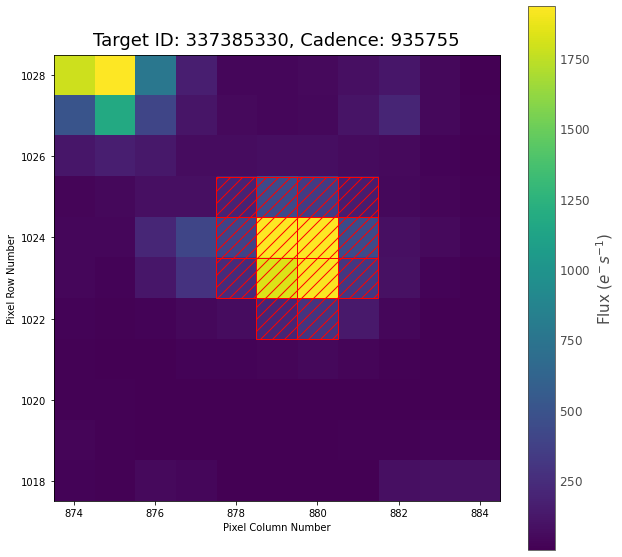

11
[[881, 1025], [880, 1025], [879, 1025], [878, 1025], [881, 1024], [880, 1024], [879, 1024], [878, 1024], [881, 1023], [880, 1023], [879, 1023], [878, 1023], [880, 1022], [879, 1022]]


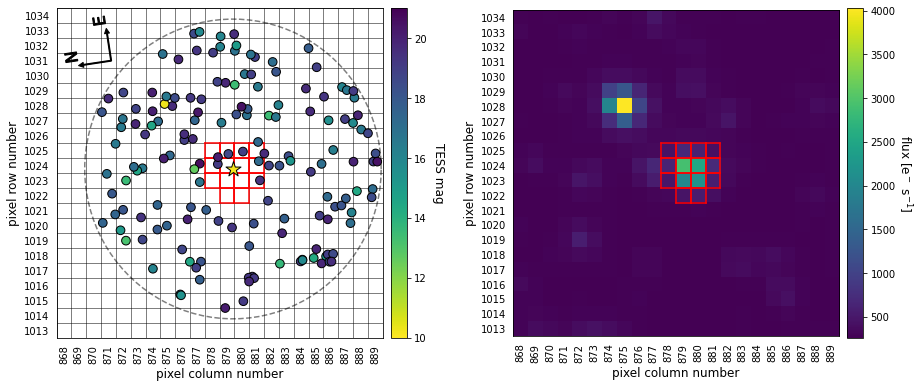

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,337385330,10.1857,9.029,8.424,8.240,110.304773,17.588810,0.592837,0.605852,3973.0,22.782800,0.000,0.000
1,763267567,18.6042,NaN,NaN,NaN,110.310975,17.589697,0.630000,0.787278,4028.0,-0.856625,21.522,81.467
2,763267613,19.1316,NaN,NaN,NaN,110.307512,17.594339,NaN,NaN,NaN,1.489450,22.011,25.281
3,763267612,20.1802,NaN,NaN,NaN,110.310262,17.593878,NaN,NaN,NaN,NaN,26.226,45.914
4,763267566,18.9563,NaN,NaN,NaN,110.311124,17.583952,NaN,NaN,4043.0,1.494400,27.944,128.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,337385285,17.5130,16.554,16.383,16.989,110.290393,17.641994,NaN,NaN,5411.0,0.473070,197.718,345.552
152,337385364,17.8147,16.577,15.834,15.785,110.348568,17.552709,0.690000,0.800100,4397.0,0.179830,198.703,130.842
153,763267527,18.3368,NaN,NaN,NaN,110.303253,17.533052,NaN,NaN,5043.0,0.743793,200.797,181.488
154,763267536,19.1031,NaN,NaN,NaN,110.329191,17.537960,NaN,NaN,NaN,0.649862,201.333,155.397


In [5]:
print(TIC, sector_no)
# Get the TPF so that we can extract the aperture mask and generate a version of the mask that triceratops can use
search_result = lk.search_targetpixelfile(TIC,  sector=sector_no)
print(search_result)
if len(search_result) > 0:
    # download the data
    try:
        tpf = search_result[0].download()
        # plot the data (the aperture_mask='pipeline' command tells it to plot the red hatched aperture)
        fig, axap = plt.subplots(figsize = (10,10))
        tpf.plot(ax=axap,frame=1000,aperture_mask='pipeline') #Use if frame 0 is NaN
        tpf.wcs.pixel_to_world(0, 0)
        plt.show()
    except Exception as e:
        print("An error occurred: {}".format(e))
else:
    print("No TPF found for {} sector {}".format(TIC, sector_no))
mask = tpf.pipeline_mask

size = len(tpf.pipeline_mask)
print(size)
# Create an array of the row and column addresses of the mask for use in triceratops
x=size-1
#x=12 # override for odd shaped windows
ap = []
while x >= 0:
    y=size-1
    #y=10 # override for odd shaped windows
    while y >= 0:
        if mask[x][y] == True:
            ap.append([tpf.column+y,tpf.row+x])
        y -= 1
    x -= 1
print(ap)    # Print the triceratops aperture array for sanity checking
pd.options.display.max_columns = None
pd.options.display.max_rows = None
# Plot the field used by triceratops
target.plot_field(sector=sector_no, ap_pixels=ap)
target.stars

In [6]:
# Calculate the depths of transits need on the target and surrounding stars to produce the observed depth
apertures = np.array([ap])
target.calc_depths(tdepth=Depth, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,337385330,10.1857,9.029,8.424,8.240,110.304773,17.588810,0.592837,0.605852,3973.0,22.782800,0.000,0.000,9.788250e-01,0.001103
1,763267567,18.6042,NaN,NaN,NaN,110.310975,17.589697,0.630000,0.787278,4028.0,-0.856625,21.522,81.467,3.544982e-04,0.000000
2,763267613,19.1316,NaN,NaN,NaN,110.307512,17.594339,NaN,NaN,NaN,1.489450,22.011,25.281,2.245649e-04,0.000000
3,763267612,20.1802,NaN,NaN,NaN,110.310262,17.593878,NaN,NaN,NaN,NaN,26.226,45.914,7.983187e-05,0.000000
4,763267566,18.9563,NaN,NaN,NaN,110.311124,17.583952,NaN,NaN,4043.0,1.494400,27.944,128.743,2.361682e-04,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,337385285,17.5130,16.554,16.383,16.989,110.290393,17.641994,NaN,NaN,5411.0,0.473070,197.718,345.552,2.423320e-26,0.000000
152,337385364,17.8147,16.577,15.834,15.785,110.348568,17.552709,0.690000,0.800100,4397.0,0.179830,198.703,130.842,4.928942e-25,0.000000
153,763267527,18.3368,NaN,NaN,NaN,110.303253,17.533052,NaN,NaN,5043.0,0.743793,200.797,181.488,2.660879e-27,0.000000
154,763267536,19.1031,NaN,NaN,NaN,110.329191,17.537960,NaN,NaN,NaN,0.649862,201.333,155.397,2.542801e-25,0.000000


In [ ]:
# Sometimes the target is maissing crucial data, use this to set a value (usually 1)
#target.update_star(256516208, "plx", 1.0)
#target.update_star(256516208, "mass", 1.0)
#target.stars

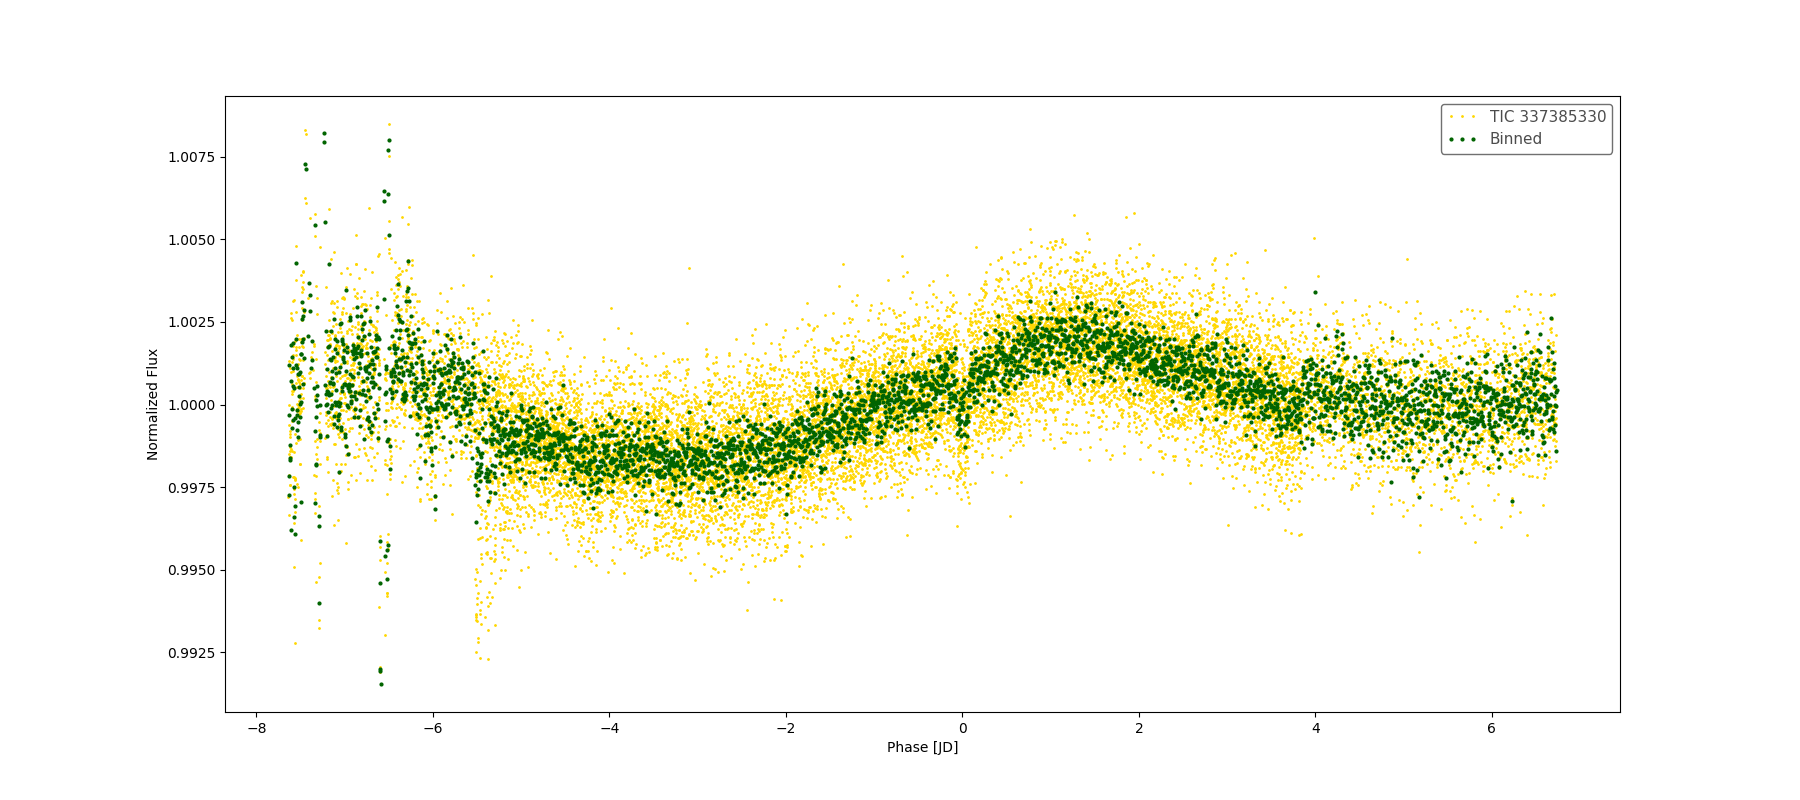

In [7]:
# Create a lightcurve from the TPF to produce a file to feed into triceratops
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask).normalize()

# If TPF data is all over the place try using PDCSAP (this is processed though so results may be affected by that)
#sector_data = lk.search_lightcurve(TIC,sector=sector)
#lc = sector_data1.download().normalize()
lc = lc.remove_outliers()

lc = lc.fold(folding_period,T0) # Fold the light curve - P_orb needs to be a single value! 

time = lc.time.value
#lc_binsize = (time.max()-time.min())/1000
lc_binsize = 5/24/60  # Aim to produce about 100 data points for triceratops to speed it up, doesn't significantly affect accuracy apparently

%matplotlib widget
plt.style.use('default')
fig, ax = plt.subplots(figsize = (18,8))

# now plot both the binned and unbinned data 
lc.plot(ax = ax, linewidth = 0, marker = 'o', color = 'gold', markersize = 1)
lc.bin(lc_binsize).plot(ax = ax, label='Binned', linewidth = 0, marker = 'o', color = 'darkgreen', markersize = 2)
plt.show()

# Define the functions to allow the user to click the start and end of the transit on the chart 
import ipywidgets as widgets
from IPython.display import clear_output
coords = []
tran = []

def onclick_dip(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    if event.button == 3:  # Right click
        global coords    
        if len(coords) < 2: # Start and end
            coords.append((ix, iy))
            tran.append(plt.axvline(ix, color = 'blue', zorder = -1))  
            
cid = fig.canvas.mpl_connect('button_press_event', onclick_dip)  # Connect the event            
            
# Create a reset button
button_reset = widgets.Button(description='Reset', button_style='warning')

out_op = widgets.Output()  # Output from the button actions

# Define reset button code
def on_reset_button_clicked(_):
    global coords, tran
    with out_op:
        clear_output()
        for line in tran:
            try: 
                line.remove()
            except:
                pass
        tran.clear()   
        coords.clear()
        
# link button and function together using a button's method
button_reset.on_click(on_reset_button_clicked)  

# Create a button to complete the process
button_op = widgets.Button(description='Done', button_style='primary')

# Define to 'done' button actions
def on_op_button_clicked(_):
    global coords
    global transit_start, transit_end, transit_mid
    with out_op:
        clear_output()
        if len(coords) < 2:
            print("Select two dips before continuing")
        else:
            transit_start = coords[0][0] 
            transit_end = coords[1][0] 
            transit_length = (transit_end-transit_start) * 24
            if transit_length < 0 : transit_length *= -1  # In case we choose the wrong way round
            transit_mid = transit_start+(transit_end-transit_start)/2
            print(transit_start, transit_end, transit_mid)
# link button and function together using a button's method
button_op.on_click(on_op_button_clicked)    

# Create and display a display box containing the buttons and the output region
boxop = widgets.VBox([button_reset,button_op,out_op ])
boxop

In [9]:
# Calculate SNR (not used, but interesting to see what it is)
# ==============
no_transits = 2
cadence_period = 2
# ==============
import numpy as np
import scipy.io
lc1 = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask).flatten().normalize()
transit_duration =  transit_end - transit_start
cadences = int(transit_duration*24*60/cadence_period)
cdpp = lc1.estimate_cdpp(transit_duration=cadences) 
depth_ppm = Depth * 1000000
print("Dip depth = {} CDPP = {} Cadences = {} Transits = {}".format(depth_ppm,cdpp,cadences,no_transits))
snr = ((depth_ppm)/cdpp.value) * np.sqrt(no_transits)
print("SNR = {:.2f}".format(snr))

Dip depth = 1080.0 CDPP = 42.993276578928764 ppm Cadences = 117 Transits = 2
SNR = 35.53


        time                flux               flux_err           time_bin_start      time_bin_size   
                                                                                            s         
-------------------- ------------------ ---------------------- -------------------- ------------------
 -0.1541264460282077 1.0008653402328491 0.00044256778589139384  -0.1558625571393188  299.9999999999989
-0.15065422380598548 1.0003619194030762  0.0005419566878117621 -0.15239033491709658  300.0000000000013
-0.14718200158376324 1.0002716779708862  0.0004425445416321357 -0.14891811269487434  299.9999999999989
-0.14370977936154103  1.000025749206543  0.0005418957443907857 -0.14544589047265213  300.0000000000013
 -0.1402375571393188 1.0001364946365356  0.0004425074051444729  -0.1419736682504299  299.9999999999989
-0.13676533491709658 1.0011335611343384  0.0005420693196356297  -0.1385014460282077  300.0000000000013
-0.13329311269487434 1.0007479190826416 0.00044261924146364134 -0.1350292

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux'>

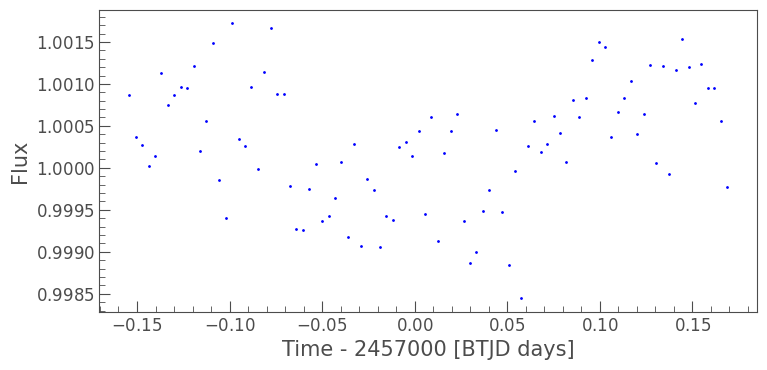

In [10]:
# Slice out the transit from the folded light curve for feeding into triceratops
%matplotlib inline
mid_point = T0
lead_time = transit_duration/2
dip_mask = (time > (transit_start-lead_time)) * (time < (transit_end+lead_time)) 

time, flux, flux_err = lc.time.value[dip_mask], lc.flux.value[dip_mask], lc.flux_err.value[dip_mask]

lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)
print(lc)
lc.plot(linewidth = 0, marker = 'o', color = 'blue', markersize = 1)

In [11]:
%%time
# Calculate the probabilites
target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb, parallel = True)  #, contrast_curve_file = "49428710_speckle.csv")


Calculating TP scenario probabilitiey for 337385330.
Calculating EB and EBx2P scenario probabilities for 337385330.
Calculating PTP scenario probability for 337385330.
Calculating PEB and PEBx2P scenario probabilities for 337385330.
Calculating STP scenario probability for 337385330.
Calculating SEB and SEBx2P scenario probabilities for 337385330.
Calculating DTP scenario probability for 337385330.
Calculating DEB and DEBx2P scenario probabilities for 337385330.
Calculating BTP scenario probability for 337385330.
Calculating BEB and BEBx2P scenario probabilities for 337385330.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 337385323.
CPU times: user 4min 40s, sys: 1.67 s, total: 4min 42s
Wall time: 59 s


In [12]:
# Print the results and save to file
df_results = target.probs
print("FPP =", np.round(target.FPP, 4))
print("NFPP =", np.round(target.NFPP, 4))
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#df_results.to_csv("{}_triceratops.csv".format(TIC_no))
savedf(TIC_no,df_results)
df_results

FPP = 0.0736
NFPP = 0.0124
Saved 337385330_triceratops/337385330_triceratops_0.csv


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,337385330,TP,0.592837,0.605852,15.532123,89.036361,0.306431,0.585912,148.145268,1.162964,0.000000,0.000000,0.752052
1,337385330,EB,0.592837,0.605852,15.532123,52.491233,1.355939,0.951121,75.543743,0.000000,0.523539,0.530403,0.001283
2,337385330,EBx2P,0.592837,0.605852,31.064246,85.895721,0.235429,0.964874,147.918558,0.000000,0.565375,0.573543,0.005545
3,337385330,PTP,0.592837,0.605852,15.532123,89.106483,0.297575,0.625244,165.228917,1.435217,0.000000,0.000000,0.129538
4,337385330,PEB,0.592837,0.605852,15.532123,43.342010,1.439598,0.956392,75.308397,0.000000,0.509374,0.513944,0.000247
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,337385330,BEB,1.016000,1.223153,15.532123,88.983042,0.291060,0.497407,6.152317,0.000000,0.214657,0.243279,0.006913
14,337385330,BEBx2P,0.805000,1.834137,31.064246,87.239037,0.491652,0.770716,4.232678,0.000000,0.804310,0.831136,0.002066
15,337385323,NTP,1.000000,10.684600,15.532123,65.221209,0.987077,0.041699,70.335518,19.672957,0.000000,0.000000,0.011069
16,337385323,NEB,1.000000,10.684600,15.532123,68.303040,1.041367,0.000060,51.718591,0.000000,0.516467,0.522232,0.001167


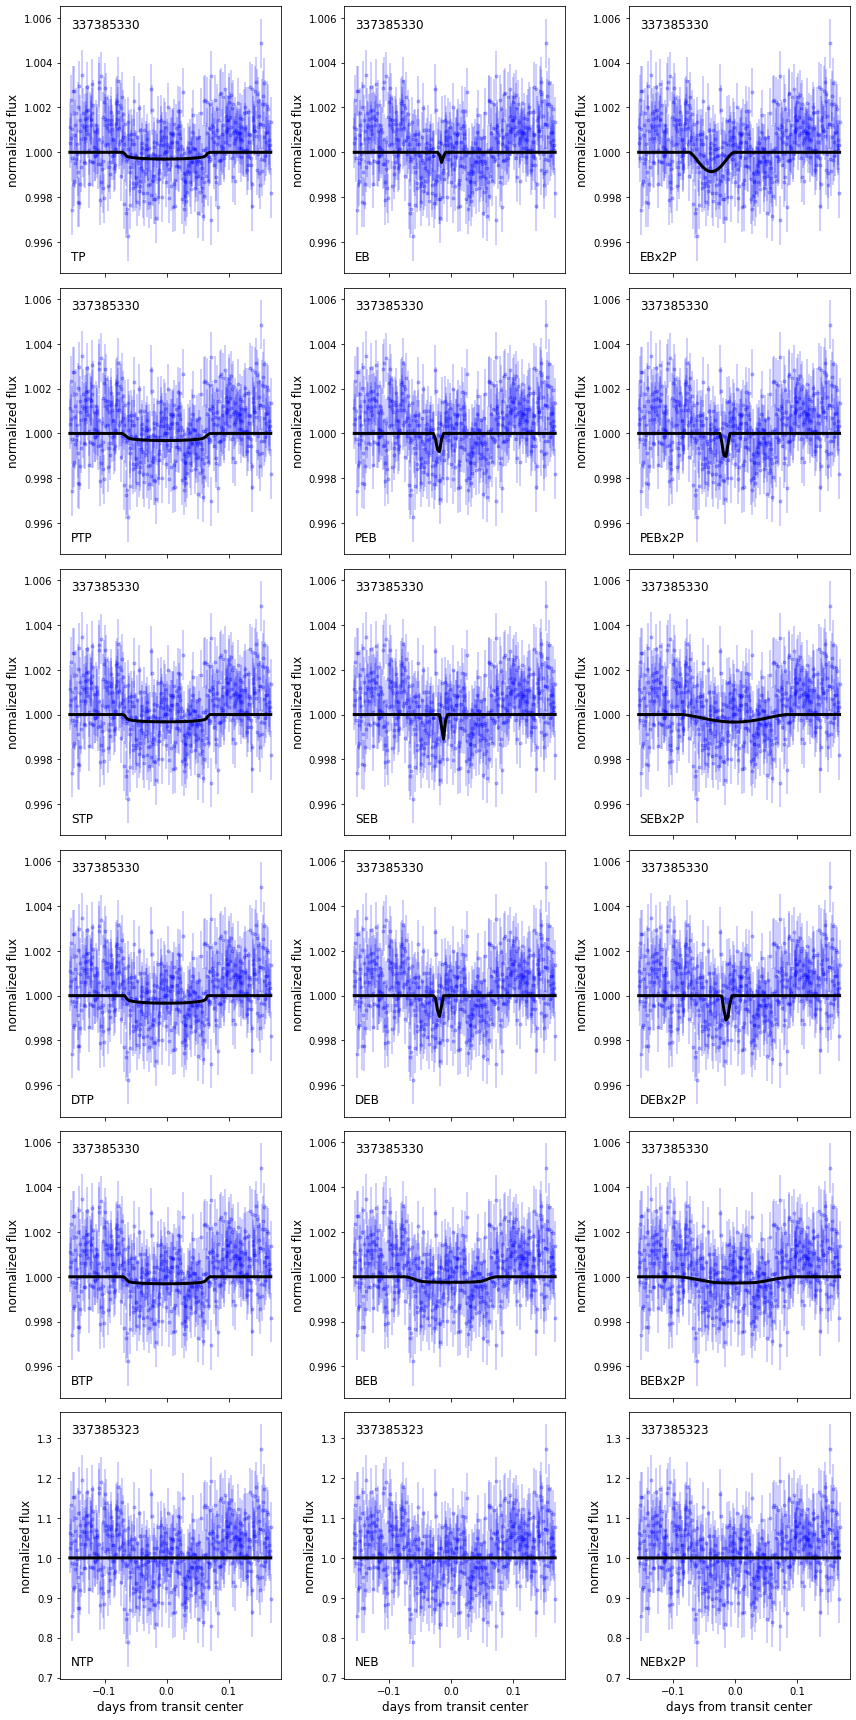

In [13]:
# Plot the fits for the various scenarios
target.plot_fits(time=time, flux_0=flux, flux_err_0=flux_err)

In [14]:
%%time
# There is a for amount of scatter in the probabilities - run 10-20 times and get the mean and sigma values for FPP
Runs = 10
FPPs = []
NFPPs = []
for i in range(Runs):
    try:
        target.calc_probs(time=lc.time.value,
                          flux_0=lc.flux.value,
                          flux_err_0=np.mean(lc.flux_err.value),
                          P_orb=P_orb,
                          parallel=True,
                          verbose=True)
    except Exception as e:
        print("An error occurred in run {}: {}".format(i+1,e))
    else:
        # Print the running mean and sigma
        FPPs.append(target.FPP)
        NFPPs.append(target.NFPP)
        meanFPP = np.round(np.mean(FPPs), 4)
        stdvFPP = np.round(np.std(FPPs), 4)
        meanNFPP = np.round(np.mean(NFPPs), 4)
        stdvNFPP = np.round(np.std(NFPPs), 4)
        print("After {} FPP = {} +/- {} NFPP = {} +/- {} ".format(i+1, meanFPP, stdvFPP, meanNFPP, stdvNFPP))
        df_results = target.probs
        savedf(TIC_no,df_results,i+1)

Calculating TP scenario probabilitiey for 337385330.
Calculating EB and EBx2P scenario probabilities for 337385330.
Calculating PTP scenario probability for 337385330.
Calculating PEB and PEBx2P scenario probabilities for 337385330.
Calculating STP scenario probability for 337385330.
Calculating SEB and SEBx2P scenario probabilities for 337385330.
Calculating DTP scenario probability for 337385330.
Calculating DEB and DEBx2P scenario probabilities for 337385330.
Calculating BTP scenario probability for 337385330.
Calculating BEB and BEBx2P scenario probabilities for 337385330.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 337385323.
After 1 FPP = 0.0704 +/- 0.0 NFPP = 0.0125 +/- 0.0 
Saved 337385330_triceratops/337385330_triceratops_1.csv
Calculating TP scenario probabilitiey for 337385330.
Calculating EB and EBx2P scenario probabilities for 337385330.
Calculating PTP scenario probability for 337385330.
Calculating PEB and PEBx2P scenario probabilities for 337385330.
Calc

In [ ]:
# Output the FPPS to  a text file

meanFPP = np.round(np.mean(FPPs), 4)
stdvFPP = np.round(np.std(FPPs), 4)
meanNFPP = np.round(np.mean(NFPPs), 4)
stdvNFPP = np.round(np.std(NFPPs), 4)

path = Path("{}_triceratops".format(TIC_no))
summary_filename = "{}_triceratops_summary.txt".format(TIC_no)
summary_full_filename = path / summary_filename
with open(summary_full_filename, "w") as f:
    #writer = csv.writer(f, delimiter='\t')
    print("FPPs:")
    f.write("Triceratops summary for {}: Sectors: {} T0: {:.4f} Period: {} SNR: {:.2f}\n".format(TIC_no, sectors, T0, P_orb, snr))
    f.write("FPPs:\n")
    for fpp in FPPs:
        f.write("{:.4f}{}".format(fpp,"\n"))
        print("{:.4f}".format(fpp))
    f.write("Mean FPP = {} +/- {}\n".format(meanFPP, stdvFPP))
    print("Mean FPP = {} +/- {}".format(meanFPP, stdvFPP))
    f.write("Mean NFPP = {} +/- {}\n".format(meanNFPP, stdvNFPP))
    print("Mean NFPP = {} +/- {}".format(meanNFPP, stdvNFPP))    
f.close()
print("Created {}".format(summary_full_filename))

In [ ]:
# Read all the generated probability files and calculate means and sds for each scenario
import pandas as pd
import numpy as np
# First read the files into data frames
df = []
for i in range(Runs):
    try:
        df.append( pd.read_csv('{}_triceratops/{}_triceratops_{}.csv'.format(TIC_no,TIC_no,i+1)))
        #print(df[i].to_string()) 
    except:
        pass
    
# Extract the scenarios and probabilities into arrays
id = []
scenario = []
prob = []
for i in range(len(df)):
    id.append(np.array(df[i]['ID']))
    scenario.append(np.array(df[i]['scenario']))
    prob.append(np.array(df[i]['prob']))
    
# Get the list of scenarios
scenarios = scenario[0]
ids = id[0]

# Go through each of the data sets, look for the probablilty for each scenario and put them into array where mean and sd can be calculated
probs = np.zeros((len(scenarios),len(df)))
for i in range(len(scenario)):  # For each data set
    for j in range(len(scenarios)):  # Look for each scenario
        if scenario[i][j] == scenarios[j]: # When found add the probability value to the array
            #print(scenario[i][j], prob[i][j])
            probs[j][i] = prob[i][j]

# Publish the results to the same text file as above
path = Path("{}_triceratops".format(TIC_no))
summary_filename = "{}_triceratops_summary.txt".format(TIC_no)
summary_full_filename = path / summary_filename
with open(summary_full_filename, "a") as f:
    print("Mean values over {} runs:".format(len(df)))
    f.write("\nMean values over {} runs:\n".format(len(df)))
    print("{:10} {:8}\t{:6}\t{:6}".format("ID","Scenario","Prob","+/-"))   
    f.write("{:10} {:8}\t{:6}\t{:6}\n".format("ID","Scenario","Prob","+/-"))   
    for i in range(len(scenarios)):
        scenario_mean = np.round(np.mean(probs[i]), 3)
        scenario_sd = np.round(np.std(probs[i]), 3)
        print("{:10s} {:8}\t{:6.4f}\t{:6.4f}".format(str(ids[i]),scenarios[i], scenario_mean, scenario_sd))
        f.write("{:10s} {:8}\t{:6.4f}\t{:6.4f}\n".format(str(ids[i]),scenarios[i], scenario_mean, scenario_sd))

f.close()
print("Updated {}".format(summary_full_filename))